In [1]:
# Load EDA pkgs
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob

# Load Data Viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/df_fake_news_without_steemming.csv')

In [3]:
df = df[df['text'].notnull()]
df = df.dropna()
df.reset_index(inplace=True)
#df = df.drop(axis=1, columns='level_0')
df.head(2)

,index,title,text,subject,date,category,length_text,length_title
0,0,donald trump sends embarrassing new years eve ...,donald trump wish americans happy new year lea...,News,2017-12-31,0,254,9
1,1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,News,2017-12-31,0,178,8


In [4]:
df = df.drop(axis=1, columns='index')
df.head(5)

,title,text,subject,date,category,length_text,length_title
0,donald trump sends embarrassing new years eve ...,donald trump wish americans happy new year lea...,News,2017-12-31,0,254,9
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,News,2017-12-31,0,178,8
2,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...,News,2017-12-30,0,315,10
3,trump obsessed even obamas name coded website ...,christmas day donald trump announced back work...,News,2017-12-29,0,239,8
4,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,News,2017-12-25,0,208,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38213 entries, 0 to 38212
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         38213 non-null  object
 1   text          38213 non-null  object
 2   subject       38213 non-null  object
 3   date          38213 non-null  object
 4   category      38213 non-null  int64 
 5   length_text   38213 non-null  int64 
 6   length_title  38213 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.0+ MB


<img src="../images/Use-Sentiment-Analysis-With-Python-to-Classify-Reviews_Watermarked.e73ba441d870.jpg" width="300" height="70" />

In [6]:
def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

In [7]:
#lambda to just show polarity and subjectivity
df['text_polarity']=df['text'].apply(sentiment).apply(lambda x: x[0])
df['text_subjectivity']=df['text'].apply(sentiment).apply(lambda x: x[1])
df['title_polarity']=df['title'].apply(sentiment).apply(lambda x: x[0])
df['title_subjectivity']=df['title'].apply(sentiment).apply(lambda x: x[1])

In [8]:
df.head(5).T

,0,1,2,3,4
title,donald trump sends embarrassing new years eve ...,drunk bragging trump staffer started russian c...,sheriff david clarke becomes internet joke thr...,trump obsessed even obamas name coded website ...,pope francis called donald trump christmas speech
text,donald trump wish americans happy new year lea...,house intelligence committee chairman devin nu...,friday revealed former milwaukee sheriff david...,christmas day donald trump announced back work...,pope francis used annual christmas day message...
subject,News,News,News,News,News
date,2017-12-31,2017-12-31,2017-12-30,2017-12-29,2017-12-25
category,0,0,0,0,0
length_text,254,178,315,239,208
length_title,9,8,10,8,7
text_polarity,0.117708,-0.014112,-0.019491,0.018391,-0.000568
text_subjectivity,0.615972,0.337102,0.538915,0.383333,0.487121
title_polarity,-0.181818,-0.25,0.0,-0.5,0.0


### <span style="color:#306998">Polarity</span>
<br>
<span style="color:#306998">
Polarity is a float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. </span> 

In [9]:
df_trump = df[df['title'] == "Trump"]
df_trump

,title,text,subject,date,category,length_text,length_title,text_polarity,text_subjectivity,title_polarity,title_subjectivity


In [10]:
text_Polarity=df.groupby(['category'])['text_polarity'].mean().sort_values()
text_Polarity

category
1    0.043172
0    0.048009
Name: text_polarity, dtype: float64

In [11]:
title_Polarity=df.groupby(['category'])['title_polarity'].mean().sort_values()
title_Polarity

category
0   -0.004394
1    0.018248
Name: title_polarity, dtype: float64

### <span style="color:#306998">Subjective</span>
<span style="color:#306998"> Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information.</span> 

In [12]:
text_Subjectivity=df.groupby(['category'])['text_subjectivity'].mean().sort_values()
text_Subjectivity

category
1    0.347115
0    0.445045
Name: text_subjectivity, dtype: float64

In [13]:
title_Subjectivity=df.groupby(['category'])['title_subjectivity'].mean().sort_values()
title_Subjectivity

category
1    0.162199
0    0.363552
Name: title_subjectivity, dtype: float64

In [14]:
df_25 = df[df['title_polarity'] < 0.25]
df_25_title_Subjectivity = df_25.groupby(['category'])['title_polarity'].count()
df_25_title_Subjectivity

category
0    14604
1    19127
Name: title_polarity, dtype: int64

In [15]:
df.describe()

,category,length_text,length_title,text_polarity,text_subjectivity,title_polarity,title_subjectivity
count,38213.000000,38213.000000,38213.000000,38213.000000,38213.000000,38213.000000,38213.000000
mean,0.544841,225.624918,8.986261,0.045374,0.391689,0.007942,0.253847
std,0.497992,175.943827,2.403175,0.109778,0.130478,0.256183,0.325640
min,0.000000,1.000000,2.000000,-1.000000,0.000000,-1.000000,0.000000
25%,0.000000,123.000000,7.000000,-0.009008,0.319697,0.000000,0.000000
50%,1.000000,204.000000,9.000000,0.042671,0.393476,0.000000,0.000000
75%,1.000000,282.000000,10.000000,0.098997,0.467717,0.000000,0.500000
max,1.000000,4820.000000,29.000000,1.000000,1.000000,1.000000,1.000000


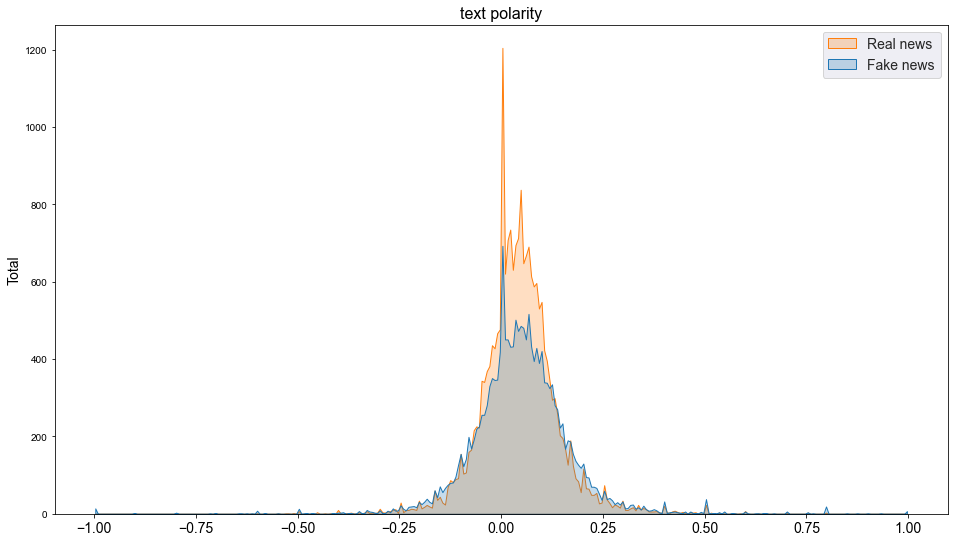

In [16]:
plt.figure(figsize=(16,9))
sns.histplot(x='text_polarity', data=df, hue='category', element="poly")
plt.title('text polarity', fontsize=16)
plt.ylabel('Total', fontsize=14)
plt.xlabel("")
plt.xticks(fontsize=14)
sns.set_style("dark")
plt.legend(['Real news', 'Fake news'], fontsize=14)
plt.show()

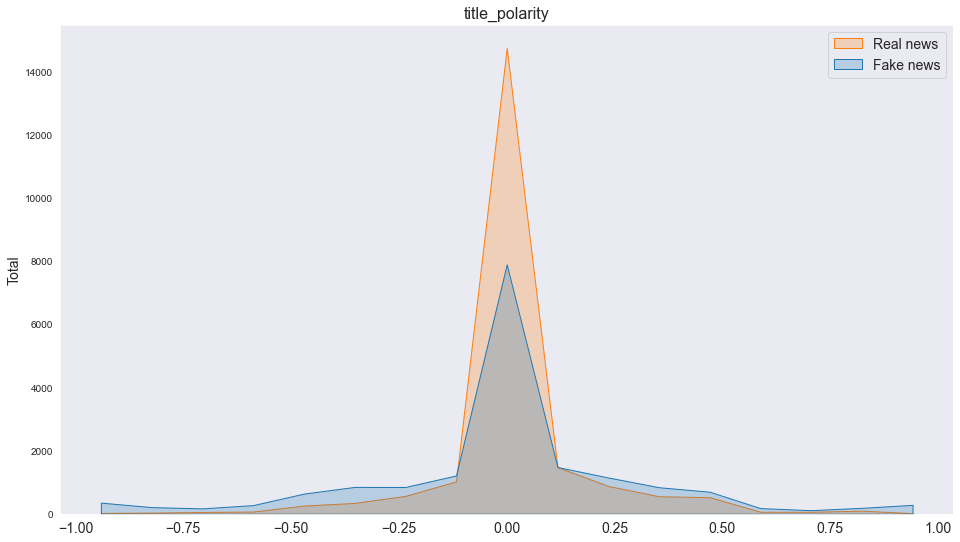

In [17]:
plt.figure(figsize=(16,9))
sns.histplot(x='title_polarity', data=df, hue='category', element="poly")
plt.title('title_polarity', fontsize=16)
plt.ylabel('Total', fontsize=14)
plt.xlabel("")
plt.xticks(fontsize=14)
sns.set_style("dark")
plt.legend(['Real news', 'Fake news'], fontsize=14)
plt.show()

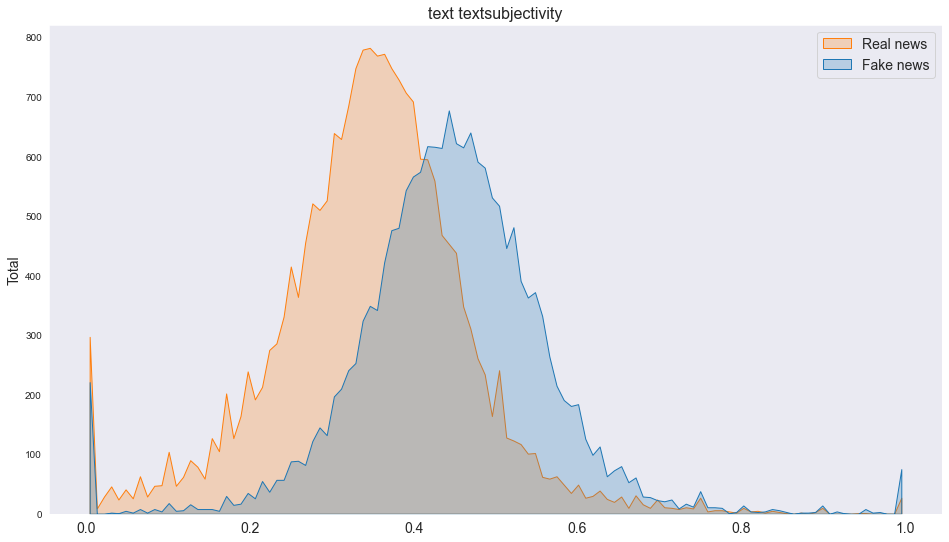

In [18]:
plt.figure(figsize=(16,9))
sns.histplot(x='text_subjectivity', data=df, hue='category', element="poly")
plt.title('text textsubjectivity', fontsize=16)
plt.ylabel('Total', fontsize=14)
plt.xlabel("")
plt.xticks(fontsize=14)
sns.set_style("dark")
plt.legend(['Real news', 'Fake news'], fontsize=14)
plt.show()

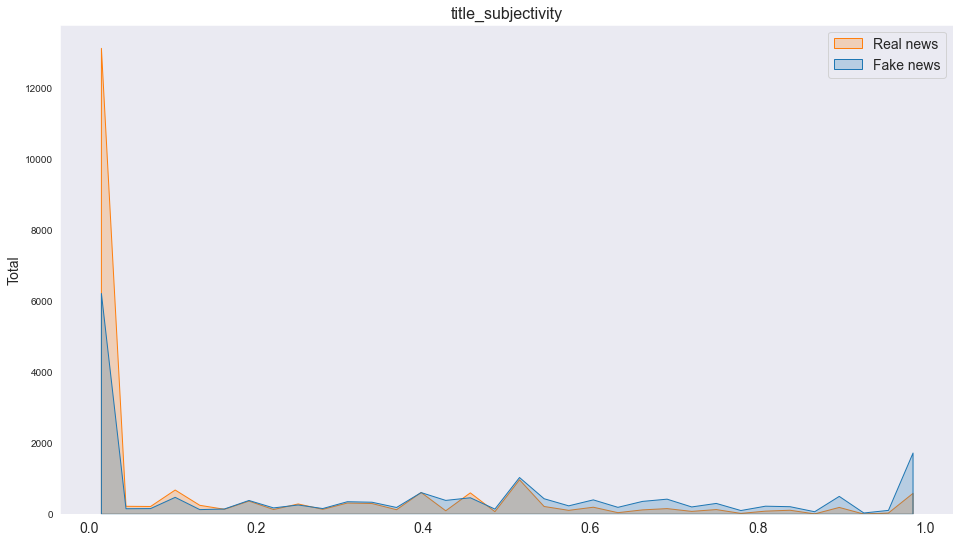

In [19]:
plt.figure(figsize=(16,9))
sns.histplot(x='title_subjectivity', data=df, hue='category', element="poly")
plt.title('title_subjectivity', fontsize=16)
plt.ylabel('Total', fontsize=14)
plt.xlabel("")
plt.xticks(fontsize=14)
sns.set_style("dark")
plt.legend(['Real news', 'Fake news'], fontsize=14)
plt.show()

In [20]:
# Saving dataframe as CSV
df.to_csv(f'../data/tableau_fake_news.csv', index=False)